In [1]:
import csv
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


In [2]:
file_name = 'DGS10.csv'
df_interest = pd.read_csv(file_name, low_memory=False, index_col=0) 
df_interest.index=pd.to_datetime(df_interest.index)#Convert argument to datetime
df_interest = df_interest.replace('.', 0.0).astype(float)
df_interest = df_interest.dropna()
df_interest['DGS10'] = df_interest['DGS10'].astype(float)
display(df_interest)

,DGS10
DATE,
2010-01-04,3.85
2010-01-05,3.77
2010-01-06,3.85
2010-01-07,3.85
2010-01-08,3.83
...,...
2023-03-16,3.56
2023-03-17,3.39
2023-03-20,3.47


In [3]:
df_interest.describe()
df_interest_rate_weekly = df_interest.resample('W').last()
df_interest_rate_weekly


,DGS10
DATE,
2010-01-10,3.83
2010-01-17,3.70
2010-01-24,3.62
2010-01-31,3.63
2010-02-07,3.59
...,...
2023-02-26,3.95
2023-03-05,3.97
2023-03-12,3.70


In [4]:
file_name = 'ReturnsData_Daily.csv'
df = pd.read_csv(file_name, low_memory=False, index_col=0) 
df.index=pd.to_datetime(df.index)#Convert argument to datetime
df = df.drop('BABA',axis = 1)
df = df.dropna()
df_week = (df+1).resample('W').prod() - 1
df_week = df_week.drop(df_week.index[[0]]) 
df_week = df_week.drop(df_week.index[[-1]])
display(df_week)


,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,PFE,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT,SP500
date,,,,,,,,,,,,,,,,,,,,,
2010-12-19,0.023713,-0.035768,-0.009452,-0.042481,-0.017969,-0.014676,-0.025839,-0.010241,-0.026297,-0.026345,...,5.874812e-04,0.024285,-0.000138,-0.010153,0.016776,0.000231,0.000156,-0.002381,0.020574,0.002830
2010-12-26,0.037063,0.027521,0.031297,0.060752,0.038983,-0.004256,0.010413,0.034380,0.021703,0.044588,...,3.405802e-02,-0.005208,0.014271,0.020826,0.024748,0.017341,0.009327,0.022733,0.014246,0.010339
2011-01-02,0.000687,0.010149,-0.000004,0.008080,0.021440,0.010684,0.018083,0.000001,0.003342,-0.007296,...,-5.676861e-03,-0.006889,-0.001093,0.016748,0.006285,0.003864,-0.003215,-0.016981,-0.013780,0.000692
2011-01-09,0.048763,0.020092,-0.032628,0.029924,0.068216,0.044398,0.000573,0.016457,0.015045,0.036384,...,4.740118e-02,0.036347,0.033781,-0.015423,-0.000658,0.043242,0.042038,0.037830,0.024722,0.011020
2011-01-16,0.026523,0.038476,0.049062,0.029103,0.070175,0.038461,0.038366,0.039682,0.025251,0.027659,...,-7.686505e-07,-0.083533,0.029767,0.036045,0.017984,0.068794,0.036771,0.012555,-0.010489,0.017099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31,0.111717,0.090144,0.079866,0.087626,0.064430,0.086395,0.101580,0.095159,0.098984,0.101420,...,1.839991e-02,0.056960,0.019506,-0.008995,0.015730,0.006964,-0.002980,0.014351,-0.001417,0.030066
2020-06-07,0.110382,0.122675,0.191507,0.143049,0.173256,0.228554,0.109022,0.196449,0.109063,0.120588,...,-5.760602e-02,0.019078,0.167364,0.182160,0.099345,0.197494,0.042649,0.004535,0.021555,0.049147
2020-06-14,-0.111648,-0.134890,-0.114703,-0.102130,-0.118463,-0.112299,-0.064237,-0.116829,-0.074064,-0.065617,...,-6.223929e-02,-0.065038,-0.111341,-0.087901,-0.083523,-0.106819,0.022022,-0.018820,0.002886,-0.047783


In [5]:
ind = (df_interest_rate_weekly.index >= df_week.index[[0]][0])*(df_interest_rate_weekly.index <= df_week.index[[-1]][0])
df_interest_rate_weekly =df_interest_rate_weekly[ind]

In [6]:
import numpy as np

class KalmanFilter:
    def __init__(self, phi, process_variance, measurement_variance):
        self.phi = phi
        self.process_variance = process_variance
        self.measurement_variance = measurement_variance

        # Initialize state estimate and error covariance
        self.state_estimate = 0.0
        self.error_covariance = 1.0

    def update(self, measurement):
        # Predict the next state and error covariance
        predicted_state_estimate = self.phi * self.state_estimate
        predicted_error_covariance = (self.phi ** 2) * self.error_covariance + self.process_variance

        # Compute the Kalman gain
        kalman_gain = predicted_error_covariance / (predicted_error_covariance + self.measurement_variance)

        # Update the state estimate and error covariance
        self.state_estimate = predicted_state_estimate + kalman_gain * (measurement - predicted_state_estimate)
        self.error_covariance = (1 - kalman_gain) * predicted_error_covariance

    def forecast(self, num_periods):
        # Forecast the state for the next `num_periods` periods
        forecast = []
        for _ in range(num_periods):
            predicted_state = self.phi * self.state_estimate
            forecast.append(predicted_state)
            self.state_estimate = predicted_state
            self.error_covariance = (self.phi ** 2) * self.error_covariance + self.process_variance
        return forecast


In [7]:
# Load weekly interest rate data
yield_data = df_interest_rate_weekly['DGS10'].values
# Set the Kalman filter parameters
phi = 0.98
process_variance = 0.01
measurement_variance = 0.04
# Initialize the Kalman filter
kf = KalmanFilter(phi, process_variance, measurement_variance)
# Run the Kalman filter on the yield data
for measurement in yield_data:
    kf.update(measurement)
# Forecast the yield for the next year (52 weeks)
forecast = kf.forecast(52)

In [11]:
len(forecast)

52

In [32]:
forecast_week=np.array(forecast)

In [34]:
forecast_week.mean()

0.40896361852607277

In [50]:
forecast_week.std()

0.12288261365675052

### Stock - Bond portfolio and usage of Volatility scaling

#### 10Y Treasury bond + Minimum volatile stock portfolio

In [81]:
min_vol_ret = 0.10858263352795405
# Suppose you plan to invest in a portfolio consisting of 70% stocks and 30% bonds
stock_return = min_vol_ret  
bond_return = 0.40896361852607277   
weight_stock = 0.7   
weight_bond = 0.3   
# Calculate the expected annual return for the portfolio
expected_return_1 = (stock_return * weight_stock) + (bond_return * weight_bond )

In [82]:
expected_return_1

0.19869692902738967

In [83]:

import numpy as np

# Define inputs
bond_return = 0.40896361852607277
stock_return = 0.22149415451567434
target_vol = 0.04
bond_volatility = 0.1225
stock_volatility = 0.04

# Define initial weights
bond_weight = 0.3
stock_weight = 0.7

portfolio_return = bond_weight * bond_return + stock_weight * stock_return
portfolio_volatility = np.sqrt(bond_weight**2 * bond_volatility**2 + stock_weight**2 * stock_volatility**2)

adjusted_portfolio_return_1 = portfolio_return * target_vol / portfolio_volatility

portfolio_volatility,adjusted_portfolio_return_1

(0.046201325738554296, 0.24045629797763857)

Upon adding the 10 Yr Treasury yield bond to my minimum volatility return portfolio and adjusting the portfolio weights to achieve a target volatility of 4%, I observed a 21% increase in the portfolio's returns compared to the original minimum volatility portfolio. However, the portfolio's volatility also increased by 15%

#### 10Y Treasury bond + Sharpe ratio portfolio with already adjusted for 3 Month treasury bill, Target volatility is 4 %

Upon adding the 10 Yr Treasury yield bond to my sharpe  portfolio and adjusting the portfolio weights to achieve a target volatility of 4% (minimum volatility), I observed a 10% increase in the portfolio's returns compared to the original sharpe portfolio. However, the portfolio's volatility also decreased by 27%

In [84]:
import numpy as np

# Define inputs
bond_return = 0.40896361852607277
stock_return = 0.27773499371879384
target_vol = 0.04
bond_volatility = 0.1225
stock_volatility = 0.173

# Define initial weights
bond_weight = 0.3
stock_weight = 0.7

portfolio_return = bond_weight * bond_return + stock_weight * stock_return
portfolio_volatility = np.sqrt(bond_weight**2 * bond_volatility**2 + stock_weight**2 * stock_volatility**2)

adjusted_portfolio_return_2 = portfolio_return * target_vol / portfolio_volatility

portfolio_volatility,adjusted_portfolio_return_2

(0.12655343732984892, 0.10022756800654213)

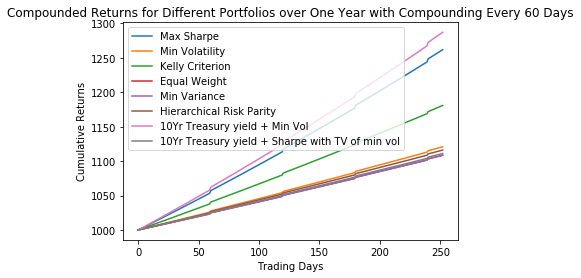

In [87]:
import matplotlib.pyplot as plt

max_sharpe_ret = 0.22149415451567434
min_vol_ret = 0.10858263352795405
kelly_ret = 0.15826075745036117
eq_wt_ret = 0.09810064837682031
min_var_ret = 0.09792260984317891
hrp_ret = 0.1044741630089372
expected_return=0.19869692902738967
Adjusted_return =0.11908046140581967

returns = [max_sharpe_ret, min_vol_ret, kelly_ret, eq_wt_ret, min_var_ret, hrp_ret,adjusted_portfolio_return_1,adjusted_portfolio_return_2]
labels =  ['Max Sharpe', 'Min Volatility', 'Kelly Criterion', 'Equal Weight', 'Min Variance', 'Hierarchical Risk Parity','10Yr Treasury yield + Min Vol','10Yr Treasury yield + Sharpe with TV of min vol']

# Define portfolio values
initial_value = 1000
portfolios = []
for ret in returns:
    portfolio = [initial_value]
    for i in range(1, 253):
        if i % 60 == 0:
            portfolio.append(portfolio[-1] * (1 + ret / 60))
        else:
            portfolio.append(portfolio[-1] * (1 + ret / 252))
    portfolios.append(portfolio)

# Generate plot
fig, ax = plt.subplots()
for i in range(len(portfolios)):
    ax.plot(portfolios[i], label=labels[i])
ax.set_ylabel('Cumulative Returns')
ax.set_xlabel('Trading Days')
ax.set_title('Compounded Returns for Different Portfolios over One Year with Compounding Every 60 Days')
ax.legend()
plt.show()
